Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['figure']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Shape of the image (211997,)


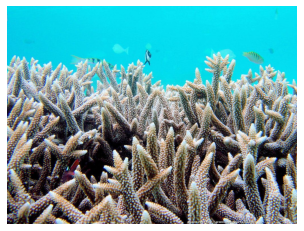

Shape of the image (278328,)


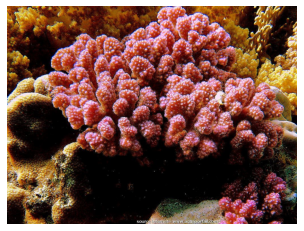

In [68]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf
import pandas as pd

%pylab inline

url_acropora = r'https://github.com/JulesPeignier/CNN-Coral-Classification/blob/main/data/acropora_muricata.jpg?raw=true'
resp = requests.get(url_acropora, stream=True).raw
image_array_acropora = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_acropora.shape}')
image_acropora = cv2.imdecode(image_array_acropora, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_acropora, cv2.COLOR_BGR2RGB))
plt.show()

url_pocillopora = r'https://github.com/JulesPeignier/CNN-Coral-Classification/blob/main/data/pocillopora_verrucosa.jpg?raw=true'
resp = requests.get(url_pocillopora, stream=True).raw
image_array_pocillopora = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_pocillopora.shape}')
image_pocillopora = cv2.imdecode(image_array_pocillopora, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_pocillopora, cv2.COLOR_BGR2RGB))
plt.show()

## Les réseaux de neurones convolutionnels CNN

On peut donc consdiérer un noyau comme un filtre appliqué à l'image pour en tirer des features. Dans un réseau de neurones convolutionnels c'est le réseau qui va trouver lui même les filtres a appliquer aux images. 

I constructed my dataset using (https://chrome.google.com/webstore/detail/image-downloader/cnpniohnfphhjihaiiggeabnkjhpaldj?hl=en-US you can use https://github.com/hardikvasa/google-images-download for a more pythonable way )

In [2]:
#Import dataset
import pathlib
import os
data_dir = tf.keras.utils.get_file(
    "coraldatase.zip",
    "https://github.com/JulesPeignier/CNN-Coral-Classification/blob/main/data/coraldataset.zip?raw=true",
    extract=False)

import zipfile
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')

data_dir = pathlib.Path('/content/datasets/coraldataset')
print(data_dir)
print(os.path.abspath(data_dir))

6660096/6645612 [==============================] - 0s 0us/step
/content/datasets/coraldataset
/content/datasets/coraldataset


In [ ]:
#!rm -rf /content/datasets

In [3]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

246


In [52]:
batch_size = 10
img_height = 200
img_width = 200

train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)

Found 246 files belonging to 2 classes.
Using 197 files for training.
Found 246 files belonging to 2 classes.
Using 49 files for validation.
['acropora_muricata', 'pocillopora_verrucosa']


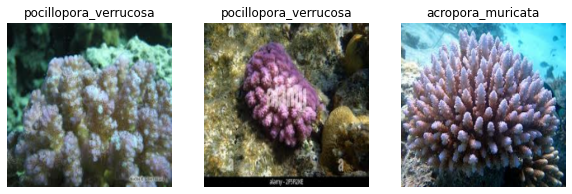

In [53]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [61]:
from tensorflow.keras import layers

num_classes = 2

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),

    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),

    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),

    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),

    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],)

In [62]:
result = model.fit(train_data, validation_data=val_data, epochs=20, verbose = 1)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


20/20 [==============================] - 4s 137ms/step - loss: 0.7075 - accuracy: 0.4822 - val_loss: 0.6922 - val_accuracy: 0.5510
Epoch 2/20
20/20 [==============================] - 2s 121ms/step - loss: 0.6873 - accuracy: 0.5381 - val_loss: 0.6752 - val_accuracy: 0.6327
Epoch 3/20
20/20 [==============================] - 2s 121ms/step - loss: 0.6406 - accuracy: 0.7005 - val_loss: 0.6834 - val_accuracy: 0.5306
Epoch 4/20
20/20 [==============================] - 2s 121ms/step - loss: 0.6193 - accuracy: 0.6904 - val_loss: 0.5448 - val_accuracy: 0.7143
Epoch 5/20
20/20 [==============================] - 2s 121ms/step - loss: 0.6078 - accuracy: 0.6599 - val_loss: 0.6640 - val_accuracy: 0.6327
Epoch 6/20
20/20 [==============================] - 3s 122ms/step - loss: 0.5382 - accuracy: 0.7513 - val_loss: 0.6038 - val_accuracy: 0.7551
Epoch 7/20
20/20 [==============================] - 2s 120ms/step - loss: 0.4797 - accuracy: 0.7614 - val_loss: 0.5436 - val_accuracy: 0.6531
Epoch 8/20
20/20 

In [63]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 197, 197, 128)     6272      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 98, 98, 128)      0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 98, 98, 128)       0         
                                                                 
 conv2d_29 (Conv2D)          (None, 95, 95, 64)        131136    
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 47, 47, 64)       0         
 g2D)                                                 

In [64]:
score = model.evaluate(val_data, verbose=0)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss     : 0.5702
Test accuracy : 0.7959


In [65]:
dfMetrics = pd.DataFrame(result.history)
dfMetrics

,loss,accuracy,val_loss,val_accuracy
0,0.707529,0.482233,0.692238,0.551020
1,0.687346,0.538071,0.675250,0.632653
2,0.640611,0.700508,0.683435,0.530612
3,0.619297,0.690355,0.544801,0.714286
4,0.607753,0.659898,0.664016,0.632653
5,0.538189,0.751269,0.603801,0.755102
6,0.479651,0.761421,0.543580,0.653061
7,0.646454,0.710660,0.697237,0.530612
8,0.687701,0.553299,0.684404,0.489796
9,0.684463,0.538071,0.682728,0.714286


Text(0, 0.5, 'accuracy')

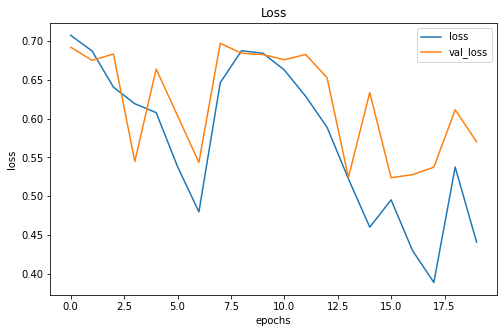

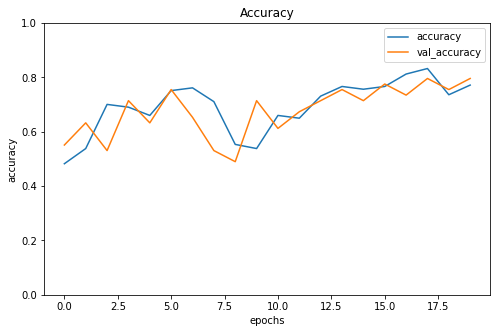

In [66]:
figure = dfMetrics.plot(y=["loss", "val_loss"], title = "Loss", label=["loss", "val_loss"], figsize=(8,5))

figure.set_xlabel('epochs')
figure.set_ylabel('loss')


figure2 = dfMetrics.plot(y= ["accuracy", "val_accuracy"], title = "Accuracy", label=["accuracy", "val_accuracy"],figsize=(8,5), ylim=(0,1))

figure2.set_xlabel('epochs')
figure2.set_ylabel('accuracy')

Saving 00051.jpg to 00051 (5).jpg


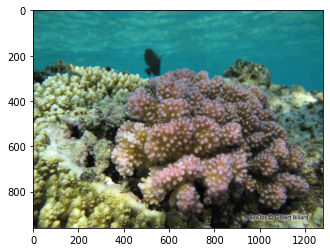

Classe = [0]
Probability Pocillopora Verrucosa = 0.6635038
Probability Acropora Muricata = 0.33649617


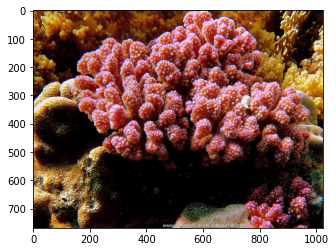

It's Pocillopora Verrucosa !


In [67]:
from google.colab import files
file_to_predict = files.upload()
for file_ in file_to_predict:
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0) 
    
    predict_image=model.predict(img_to_predict)
    classes_image=np.argmax(predict_image,axis=1)   

    print('Classe =', classes_image)
    print('Probability Pocillopora Verrucosa =', predict_image[0][0])
    print('Probability Acropora Muricata =', predict_image[0][1])
    
    if classes_image == 1:
        plt.imshow(cv2.cvtColor(image_acropora, cv2.COLOR_BGR2RGB))
        plt.show()
        print("It's Acropora Muricata !")
    elif classes_image == 0 :
        plt.imshow(cv2.cvtColor(image_pocillopora, cv2.COLOR_BGR2RGB))
        plt.show()
        print("It's Pocillopora Verrucosa !")